<a href="https://colab.research.google.com/github/jahnavi214/My_Portfolio/blob/main/network_security.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

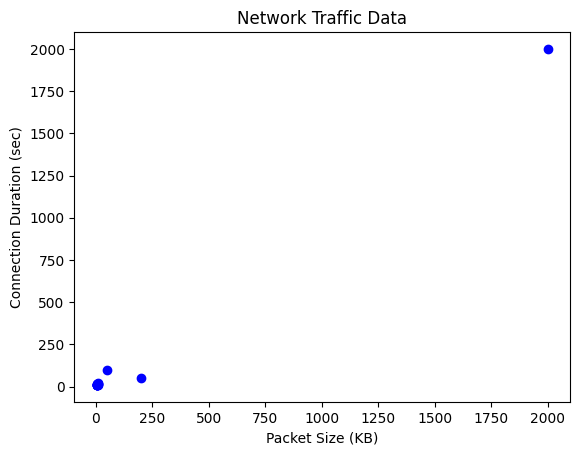

    Packet Size (KB)  Connection Duration (sec)  Number of Packets  Anomaly
0                  5                         10                 20   Normal
1                  8                         15                 25   Normal
2                  6                         12                 22   Normal
3                  7                         11                 23   Normal
4                  9                         14                 30   Normal
5                 50                        100                500  Anomaly
6                200                         50               1000  Anomaly
7                  6                         13                 21   Normal
8                  6                         12                 23   Normal
9                  7                         11                 22   Normal
10                 7                         14                 25   Normal
11                 8                         12                 22   Normal
12          

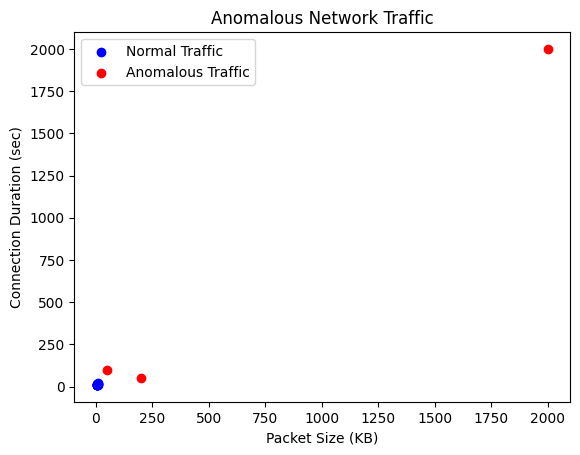

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Simulating network traffic data
# Features: [Packet Size (KB), Connection Duration (sec), Number of Packets]
data = {
    'Packet Size (KB)': [5, 8, 6, 7, 9, 50, 200, 6, 6, 7, 7, 8, 2000, 6, 10],
    'Connection Duration (sec)': [10, 15, 12, 11, 14, 100, 50, 13, 12, 11, 14, 12, 2000, 12, 20],
    'Number of Packets': [20, 25, 22, 23, 30, 500, 1000, 21, 23, 22, 25, 22, 3000, 21, 35]
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Visualizing the dataset
plt.scatter(df['Packet Size (KB)'], df['Connection Duration (sec)'], color='blue', label='Normal Traffic')
plt.xlabel('Packet Size (KB)')
plt.ylabel('Connection Duration (sec)')
plt.title('Network Traffic Data')
plt.show()

# Train the anomaly detection model
model = IsolationForest(contamination=0.2)  # Contamination is the proportion of outliers in the data
model.fit(df)

# Predict anomalies
df['Anomaly'] = model.predict(df)

# Mark anomalies (Anomaly = -1, Normal = 1)
df['Anomaly'] = df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Show results
print(df)

# Visualize the anomalies
plt.scatter(df[df['Anomaly'] == 'Normal']['Packet Size (KB)'],
            df[df['Anomaly'] == 'Normal']['Connection Duration (sec)'],
            color='blue', label='Normal Traffic')
plt.scatter(df[df['Anomaly'] == 'Anomaly']['Packet Size (KB)'],
            df[df['Anomaly'] == 'Anomaly']['Connection Duration (sec)'],
            color='red', label='Anomalous Traffic')
plt.xlabel('Packet Size (KB)')
plt.ylabel('Connection Duration (sec)')
plt.title('Anomalous Network Traffic')
plt.legend()
plt.show()
